# Define and Train a CNN Classifier 

goal:



## CNN Network

## Optimizers and Loss Function

## Training

## Evaluate Result

## Improvements


### Import required libraries
We will import all libraries in the beginning of the notebook to keep things a little orderd.

In [2]:
import random
import numpy as np
import PIL
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import models
import utils
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Data Set

In [3]:
class_labels = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 
                5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

## Data Vizualisation
We can use the FashionMNIST dataset class from the torchvision module to load the data. 
The result is image label pairs, that is a PIL image and an integer Tensor encoding the category. 
Let's use this to vizualize some images with their associated labels.

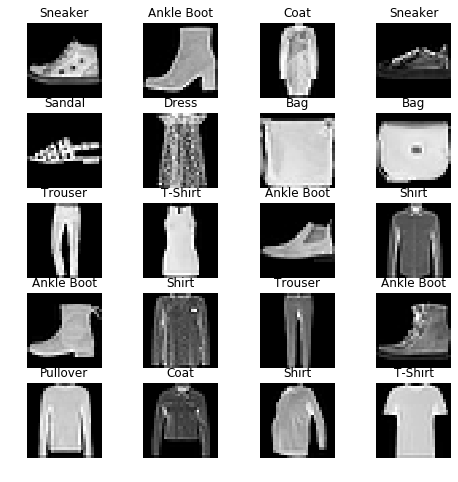

In [3]:
dataset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/')
fig = plt.figure(figsize=(8,8));
cols = 4
rows = 5
samples = random.sample(range(0, len(dataset)), rows*cols)
for i in range(rows*cols):
    img, label = dataset[samples[i]]
    fig.add_subplot(rows, cols, i+1)
    plt.title(class_labels[label.item()])
    plt.axis('off')
    plt.imshow(img, cmap='gray')

## Data Loading
Before we actually load the data,we first transform the PIL images to tensors and normalize them to a range of [-1,1].
Additionally, we define a test and training set using the same transformation.
We use a Dataloader to finally load the data, grouped by the provided batch size.

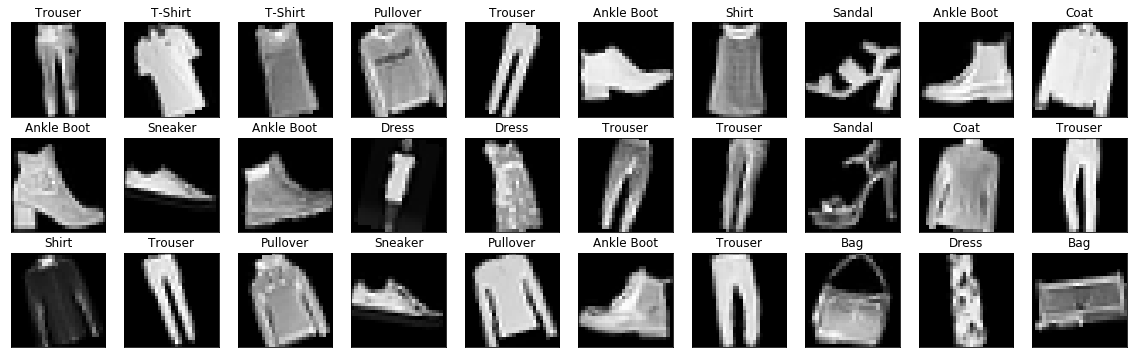

In [47]:
# Define a batch size 
batch_size = 10

# default transform
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

augmeted_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
    #transforms.RandomResizedCrop(28, scale=(0.8, 1.2)),
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#get data loader
testloader = utils.load_data(batch_size=batch_size, transform=augmeted_transform, train=False)

# plot 3 batches of size 10 from the trainloader
num_batches = 3

fig = plt.figure(figsize=(20, 6))
for bc, (imgs, labels) in enumerate(testloader):
    for i, (img, label) in enumerate(zip(*(imgs, labels)), 1):
        ax = fig.add_subplot(num_batches, batch_size, bc*batch_size+i, xticks=[], yticks=[])
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.set_title(class_labels[label.item()])
    if num_batches <= bc+1:
        break


## Training with Linear Net
Begin training with net that has three linear layers and see how that performs.

In [30]:
model = models.LinearModel()

# NLLLoss, not Crossentropy because model outputs log softmax
criterion = nn.NLLLoss()

# Stochastic gradient decent without momentum, and leraning rate 0.001
optimizer = optim.SGD(model.parameters(), lr=1e-3)

batch_size=16

trainloader  = utils.load_data(batch_size, train=True)
testloader  = utils.load_data(batch_size, train=False)

running_losses  = utils.train(model, criterion, optimizer, trainloader, epochs=50, print_every=1000)

loss, accuracy = utils.eval_model(model, criterion, optimizer, testloader)
print("Test Loss:{}, Acc.: {}".format(loss, accuracy))

Epoch: 1, Batch: 1000, Avg. Loss: 1.9816255201101303
Epoch: 1, Batch: 2000, Avg. Loss: 1.6096719510555266
Epoch: 1, Batch: 3000, Avg. Loss: 1.4305474152565003
Epoch: 2, Batch: 1000, Avg. Loss: 2.2426839973032475
Epoch: 2, Batch: 2000, Avg. Loss: 1.1025474724173545
Epoch: 2, Batch: 3000, Avg. Loss: 0.9749093818366528
Epoch: 3, Batch: 1000, Avg. Loss: 1.504756795719266
Epoch: 3, Batch: 2000, Avg. Loss: 0.8098120206892491
Epoch: 3, Batch: 3000, Avg. Loss: 0.8079269830137491
Epoch: 4, Batch: 1000, Avg. Loss: 1.3855400730520486
Epoch: 4, Batch: 2000, Avg. Loss: 0.7556005072295666
Epoch: 4, Batch: 3000, Avg. Loss: 0.7485426345169545
Epoch: 5, Batch: 1000, Avg. Loss: 1.3106715960502624
Epoch: 5, Batch: 2000, Avg. Loss: 0.7281224539130926
Epoch: 5, Batch: 3000, Avg. Loss: 0.7197966846972704
Epoch: 6, Batch: 1000, Avg. Loss: 1.255588048607111
Epoch: 6, Batch: 2000, Avg. Loss: 0.7169037631750107
Epoch: 6, Batch: 3000, Avg. Loss: 0.706837394669652
Epoch: 7, Batch: 1000, Avg. Loss: 1.2271347890198

Test Loss:0.3618898391723633, Acc.: 0.8694999814033508


(0.25, 2)

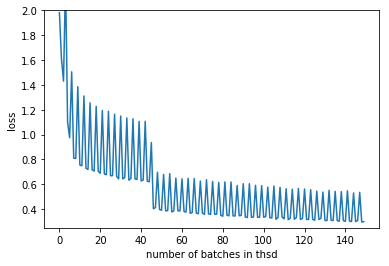

In [36]:
print("Test Loss:{}, Acc.: {}".format(loss, accuracy))
# visualize the loss as the network trained

plt.plot(running_losses, label='train')
#plt.plot(test_losses, label='validation')

plt.xlabel('number of batches in thsd')
plt.ylabel('loss')
plt.ylim(0.25, 2) 


## Define CNN 
The network architecture is defined by a series of different layers:
- conv layer
- maxpool layer
- linear layer


In [48]:
model = models.SimpleCNN()

# NLLLoss, not Crossentropy because model outputs log softmax
criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=1e-3)

batch_size=16

trainloader  = utils.load_data(batch_size, train=True)
testloader  = utils.load_data(batch_size, train=False)

running_losses  = utils.train(model, criterion, optimizer, trainloader, epochs=50, print_every=1000)

loss, accuracy = utils.eval_model(model, criterion, optimizer, testloader)
print("Test Loss:{}, Acc.: {}".format(loss, accuracy))



Epoch: 1, Batch: 1000, Avg. Loss: 2.2376960583925247
Epoch: 1, Batch: 2000, Avg. Loss: 1.6680641930103302
Epoch: 1, Batch: 3000, Avg. Loss: 0.9134593178033829
Epoch: 2, Batch: 1000, Avg. Loss: 1.3456127387732268
Epoch: 2, Batch: 2000, Avg. Loss: 0.6881617647409439
Epoch: 2, Batch: 3000, Avg. Loss: 0.6977896195650101
Epoch: 3, Batch: 1000, Avg. Loss: 1.1585620903223752
Epoch: 3, Batch: 2000, Avg. Loss: 0.650788189843297
Epoch: 3, Batch: 3000, Avg. Loss: 0.639343979626894
Epoch: 4, Batch: 1000, Avg. Loss: 1.0962369398772716
Epoch: 4, Batch: 2000, Avg. Loss: 0.6225118413418531
Epoch: 4, Batch: 3000, Avg. Loss: 0.5862695636451244
Epoch: 5, Batch: 1000, Avg. Loss: 1.0418477619439364
Epoch: 5, Batch: 2000, Avg. Loss: 0.581900776669383
Epoch: 5, Batch: 3000, Avg. Loss: 0.5693277713805437
Epoch: 6, Batch: 1000, Avg. Loss: 0.9748922472447157
Epoch: 6, Batch: 2000, Avg. Loss: 0.5495623954832554
Epoch: 6, Batch: 3000, Avg. Loss: 0.5545869927704334
Epoch: 7, Batch: 1000, Avg. Loss: 0.9496193870306

Test Loss:0.3789575695991516, Acc.: 0.8655999898910522


(0.25, 2)

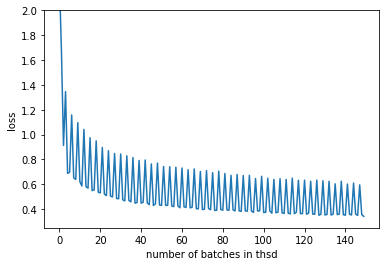

In [49]:
print("Test Loss:{}, Acc.: {}".format(loss, accuracy))
# visualize the loss as the network trained

plt.plot(running_losses, label='train')
#plt.plot(test_losses, label='validation')

plt.xlabel('number of batches in thsd')
plt.ylabel('loss')
plt.ylim(0.25, 2) 

In [6]:
model = models.DeepCNN()

# NLLLoss, not Crossentropy because model outputs log softmax
criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=1e-3)

batch_size=16

trainloader  = utils.load_data(batch_size, train=True)
testloader  = utils.load_data(batch_size, train=False)

d_running_losses  = utils.train(model, criterion, optimizer, trainloader, epochs=30, print_every=1000)

d_loss, d_accuracy = utils.eval_model(model, criterion, optimizer, testloader)
print("Test Loss:{}, Acc.: {}".format(d_loss, d_accuracy))


Epoch: 1, Batch: 1000, Avg. Loss: 2.2150154094696046
Epoch: 1, Batch: 2000, Avg. Loss: 1.2521215843260287
Epoch: 1, Batch: 3000, Avg. Loss: 0.8220136408805847
Epoch: 2, Batch: 1000, Avg. Loss: 1.279806665301323
Epoch: 2, Batch: 2000, Avg. Loss: 0.6715696987509727
Epoch: 2, Batch: 3000, Avg. Loss: 0.6447120285779238
Epoch: 3, Batch: 1000, Avg. Loss: 1.060950048610568
Epoch: 3, Batch: 2000, Avg. Loss: 0.5878262025564909
Epoch: 3, Batch: 3000, Avg. Loss: 0.5810831236094236
Epoch: 4, Batch: 1000, Avg. Loss: 0.9669797632247209
Epoch: 4, Batch: 2000, Avg. Loss: 0.538693823441863
Epoch: 4, Batch: 3000, Avg. Loss: 0.5344062996208667
Epoch: 5, Batch: 1000, Avg. Loss: 0.8939603509008884
Epoch: 5, Batch: 2000, Avg. Loss: 0.5030298356562853
Epoch: 5, Batch: 3000, Avg. Loss: 0.49942015841603277
Epoch: 6, Batch: 1000, Avg. Loss: 0.839004488453269
Epoch: 6, Batch: 2000, Avg. Loss: 0.48465972039103505
Epoch: 6, Batch: 3000, Avg. Loss: 0.4762523713707924
Epoch: 7, Batch: 1000, Avg. Loss: 0.804474614351

KeyboardInterrupt: 

 would say that this could be due to numerical stability reasons. This is related but not similar to negative log likelihood, where the multiplications becomes a summation. In both cases though you could prevent numerical over-/underflow.

The conversion for the softmax is basically

softmax = e^{…} / [sum_k e^{…, class_k, …}]

logsoftmax = log(e^{…}) - log [sum_k e^{…, class_k, …}]

So, you can see that this could be numerically more stable since you don’t have the division there.
